In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data into pandas dataframe
data = pd.read_excel('/content/sample_data/CLC Data_s.xlsx')

In [3]:
# split data into input and output variables
X = data.iloc[:,:12]
y1 = data.iloc[:,12]
y2 = data.iloc[:,13]

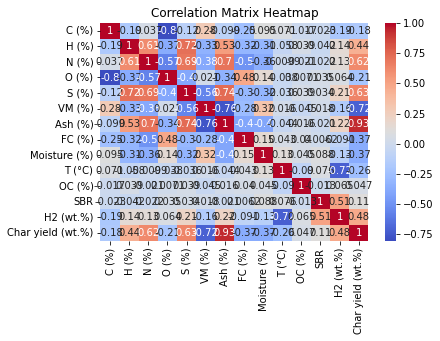

In [4]:
# create correlation matrix
corr = data.corr()

# plot heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

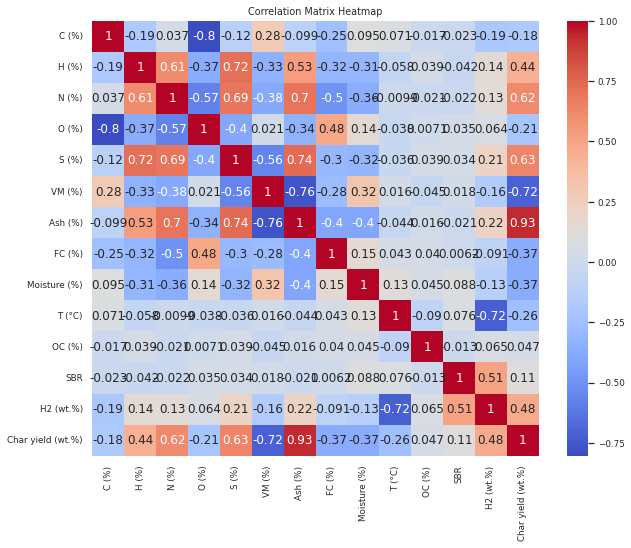

In [8]:
# create correlation matrix
corr = data.corr()

# plot heatmap
sns.set(font_scale=0.8)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, annot_kws={"size": 12})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [9]:
# print summary statistics for input variables
print('Input Variables Summary Statistics:')
print(X.describe())

# print summary statistics for output variable 1
print('\nOutput Variable 1 Summary Statistics:')
print(y1.describe())

# print summary statistics for output variable 2
print('\nOutput Variable 2 Summary Statistics:')
print(y2.describe())


Input Variables Summary Statistics:
            C (%)       H (%)       N (%)       O (%)       S (%)      VM (%)  \
count  236.000000  236.000000  236.000000  236.000000  236.000000  236.000000   
mean    49.856263    6.350771    1.381668   42.207962    0.203335   75.267783   
std      3.999680    1.316009    1.456071    4.687594    0.390067    7.553512   
min     40.020000    3.999600    0.100000   27.360000    0.000000   49.357766   
25%     47.649030    5.997775    0.494692   39.366227    0.000000   71.106176   
50%     48.912714    6.204267    0.880000   44.066298    0.000000   76.122673   
75%     52.846674    6.430939    1.619838   45.557022    0.310034   80.713229   
max     60.460000   13.672922    8.210000   52.860000    2.278820   94.161220   

          Ash (%)      FC (%)  Moisture (%)       T (°C)      OC (%)  \
count  236.000000  236.000000    236.000000   236.000000  236.000000   
mean     7.402893   17.329364     -0.000040   902.220969   33.389831   
std      7.928137 

In [12]:
# split data into training and testing datasets
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.3, random_state=42)

In [13]:
# standardize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# create summary statistics dataframe
X_summary = X.describe()
y1_summary = y1.describe()
y2_summary = y2.describe()
summary_df = pd.concat([X_summary, y1_summary, y2_summary], axis=1)

# export summary statistics as CSV file
summary_df.to_csv('summary_statistics.csv')

In [11]:
import os
print(os.getcwd())

/content


In [14]:
# perform hyper parameter tuning using GridSearchCV for all three algorithms
# SVM
svm = SVR()
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
svm_gs = GridSearchCV(svm, svm_params, cv=5)
svm_gs.fit(X_train, y1_train)
svm_model1 = svm_gs.best_estimator_
svm_gs.fit(X_train, y2_train)
svm_model2 = svm_gs.best_estimator_

In [46]:
# Random Forest
rf = RandomForestRegressor()
rf_params = {'n_estimators': [100, 500, 1000], 'max_depth': [5, 10, 20]}
rf_gs = GridSearchCV(rf, rf_params, cv=5)
rf_gs.fit(X_train, y1_train)
rf_model1 = rf_gs.best_estimator_
rf_gs.fit(X_train, y2_train)
rf_model2 = rf_gs.best_estimator_

In [16]:
# Gradient Boosting
gbr = GradientBoostingRegressor()
gbr_params = {'n_estimators': [100, 500, 1000], 'max_depth': [5, 10, 20]}
gbr_gs = GridSearchCV(gbr, gbr_params, cv=5)
gbr_gs.fit(X_train, y1_train)
gbr_model1 = gbr_gs.best_estimator_
gbr_gs.fit(X_train, y2_train)
gbr_model2 = gbr_gs.best_estimator_

In [17]:
# make predictions on test data and calculate metrics
# SVM
svm_y1_pred = svm_model1.predict(X_test)
svm_y2_pred = svm_model2.predict(X_test)
svm_y1_r2 = r2_score(y1_test, svm_y1_pred)
svm_y2_r2 = r2_score(y2_test, svm_y2_pred)
svm_y1_rmse = np.sqrt(mean_squared_error(y1_test, svm_y1_pred))
svm_y2_rmse = np.sqrt(mean_squared_error(y2_test, svm_y2_pred))
svm_y1_mae = mean_absolute_error(y1_test, svm_y1_pred)
svm_y2_mae = mean_absolute_error(y2_test, svm_y2_pred)

In [19]:
# Random Forest
rf_y1_pred = rf_model1.predict(X_test)
rf_y2_pred = rf_model2.predict(X_test)
rf_y1_r2 = r2_score(y1_test, rf_y1_pred)
rf_y2_r2 = r2_score(y2_test, rf_y2_pred)
rf_y1_rmse = np.sqrt

In [20]:
# make predictions on test data and calculate metrics
# SVM
svm_y1_pred_test = svm_model1.predict(scaler.transform(X_test))
svm_y2_pred_test = svm_model2.predict(scaler.transform(X_test))
svm_y1_r2_test = r2_score(y1_test, svm_y1_pred_test)
svm_y2_r2_test = r2_score(y2_test, svm_y2_pred_test)
svm_y1_rmse_test = np.sqrt(mean_squared_error(y1_test, svm_y1_pred_test))
svm_y2_rmse_test = np.sqrt(mean_squared_error(y2_test, svm_y2_pred_test))
svm_y1_mae_test = mean_absolute_error(y1_test, svm_y1_pred_test)
svm_y2_mae_test = mean_absolute_error(y2_test, svm_y2_pred_test)

# Random Forest
rf_y1_pred_test = rf_model1.predict(scaler.transform(X_test))
rf_y2_pred_test = rf_model2.predict(scaler.transform(X_test))
rf_y1_r2_test = r2_score(y1_test, rf_y1_pred_test)
rf_y2_r2_test = r2_score(y2_test, rf_y2_pred_test)
rf_y1_rmse_test = np.sqrt(mean_squared_error(y1_test, rf_y1_pred_test))
rf_y2_rmse_test = np.sqrt(mean_squared_error(y2_test, rf_y2_pred_test))
rf_y1_mae_test = mean_absolute_error(y1_test, rf_y1_pred_test)
rf_y2_mae_test = mean_absolute_error(y2_test, rf_y2_pred_test)

# Gradient Boosting
gbr_y1_pred_test = gbr_model1.predict(scaler.transform(X_test))
gbr_y2_pred_test = gbr_model2.predict(scaler.transform(X_test))
gbr_y1_r2_test = r2_score(y1_test, gbr_y1_pred_test)
gbr_y2_r2_test = r2_score(y2_test, gbr_y2_pred_test)
gbr_y1_rmse_test = np.sqrt(mean_squared_error(y1_test, gbr_y1_pred_test))
gbr_y2_rmse_test = np.sqrt(mean_squared_error(y2_test, gbr_y2_pred_test))
gbr_y1_mae_test = mean_absolute_error(y1_test, gbr_y1_pred_test)
gbr_y2_mae_test = mean_absolute_error(y2_test, gbr_y2_pred_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but Standa

In [31]:
# calculate metrics for all three algorithms on training and test datasets
# SVM
svm_train_metrics = [r2_score(y1_train, svm_model1.predict(X_train)), r2_score(y2_train, svm_model2.predict(X_train)),                      np.sqrt(mean_squared_error(y1_train, svm_model1.predict(X_train))), np.sqrt(mean_squared_error(y2_train, svm_model2.predict(X_train))),                     mean_absolute_error(y1_train, svm_model1.predict(X_train)), mean_absolute_error(y2_train, svm_model2.predict(X_train))]
svm_test_metrics = [svm_y1_r2_test, svm_y2_r2_test, svm_y1_rmse_test, svm_y2_rmse_test, svm_y1_mae_test, svm_y2_mae_test]



In [37]:
# Random Forest
rf_train_metrics = [r2_score(y1_train, rf_model1.predict(X_train)), r2_score(y2_train, rf_model2.predict(X_train)),                     np.sqrt(mean_squared_error(y1_train, rf_model1.predict(X_train))), np.sqrt(mean_squared_error(y2_train, rf_model2.predict(X_train))),                    mean_absolute_error(y1_train, rf_model1.predict(X_train)), mean_absolute_error(y2_train, rf_model2.predict(X_train))]
rf_test_metrics = [rf_y1_r2_test, rf_y2_r2_test, rf_y1_rmse_test, rf_y2_rmse_test, rf_y1_mae_test, rf_y2_mae_test]

In [36]:
# Gradient Boosting
gbr_train_metrics = [r2_score(y1_train, gbr_model1.predict(X_train)), r2_score(y2_train, gbr_model2.predict(X_train)),                      np.sqrt(mean_squared_error(y1_train, gbr_model1.predict(X_train))), np.sqrt(mean_squared_error(y2_train, gbr_model2.predict(X_train))),                     mean_absolute_error(y1_train, gbr_model1.predict(X_train)), mean_absolute_error(y2_train, gbr_model2.predict(X_train))]
gbr_test_metrics = [gbr_y1_r2_test, gbr_y2_r2_test, gbr_y1_rmse_test, gbr_y2_rmse_test, gbr_y1_mae_test, gbr_y2_mae_test]

In [35]:
# create dataframes to display metrics
index = ['R2', 'RMSE', 'MAE']
columns = ['SVM_train_y1', 'SVM_train_y2', 'SVM_test_y1', 'SVM_test_y2', 'RF_train_y1', 'RF_train_y2', 'RF_test_y1', 'RF_test_y2', 'GBR_train_y1', 'GBR_train_y2', 'GBR_test_y1', 'GBR_test_y2']

In [40]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# load data into pandas dataframe
df = pd.read_excel('/content/sample_data/CLC Data_s.xlsx')
# Splitting the dataset into input and output variables
X = df.iloc[:, :12].values
y1 = df.iloc[:, 12].values
y2 = df.iloc[:, 13].values

# Splitting the data into training and testing datasets
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.2, random_state = 0)
_, _, y2_train, y2_test = train_test_split(X, y2, test_size = 0.2, random_state = 0)

# Standardizing the input variables
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Hyperparameter tuning for SVM
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search_svm = GridSearchCV(estimator = SVR(), param_grid = parameters, scoring = 'neg_mean_squared_error', cv = 10, n_jobs = -1)
grid_search_svm.fit(X_train, y1_train)
best_parameters_svm = grid_search_svm.best_params_

# Fitting SVM to the training set with the best parameters
regressor_svm = SVR(kernel = best_parameters_svm['kernel'], C = best_parameters_svm['C'])
regressor_svm.fit(X_train, y1_train)

# Predicting the test set results
y1_pred_svm = regressor_svm.predict(X_test)
y1_train_pred_svm = regressor_svm.predict(X_train)

In [50]:
# load data into pandas dataframe
data = pd.read_excel('/content/sample_data/CLC Data_s.xlsx')

In [51]:
# Split data into input and output variables
X = data.iloc[:, :12].values
y1 = data.iloc[:, 12].values # first output variable
y2 = data.iloc[:, 13].values # second output variable

# Split data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create models
svm = SVR()
rf = RandomForestRegressor()
gbr = GradientBoostingRegressor()


In [52]:
# Define hyperparameters to optimize
svm_parameters = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
rf_parameters = {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]}
gbr_parameters = {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10], 'learning_rate': [0.1, 0.01]}

In [53]:
# Perform hyperparameter optimization using GridSearchCV
svm_grid = GridSearchCV(svm, svm_parameters, scoring='r2')
svm_grid.fit(X_train, y1_train)
svm_best = svm_grid.best_estimator_

rf_grid = GridSearchCV(rf, rf_parameters, scoring='r2')
rf_grid.fit(X_train, y1_train)
rf_best = rf_grid.best_estimator_

gbr_grid = GridSearchCV(gbr, gbr_parameters, scoring='r2')
gbr_grid.fit(X_train, y1_train)
gbr_best = gbr_grid.best_estimator_

In [55]:
# Evaluate the models on the test set
y1_svm_pred = svm_best.predict(X_test)
y1_rf_pred = rf_best.predict(X_test)
y1_gbr_pred = gbr_best.predict(X_test)

y2_svm_pred = svm_best.predict(X_test)
y2_rf_pred = rf_best.predict(X_test)
y2_gbr_pred = gbr_best.predict(X_test)

r2_svm = r2_score(y1_test, y1_svm_pred)
r2_rf = r2_score(y1_test, y1_rf_pred)
r2_gbr = r2_score(y1_test, y1_gbr_pred)

rmse_svm = np.sqrt(mean_squared_error(y1_test, y1_svm_pred))
rmse_rf = np.sqrt(mean_squared_error(y1_test, y1_rf_pred))
rmse_gbr = np.sqrt(mean_squared_error(y1_test, y1_gbr_pred))

mae_svm = mean_absolute_error(y1_test, y1_svm_pred)
mae_rf = mean_absolute_error(y1_test, y1_rf_pred)
mae_gbr = mean_absolute_error(y1_test, y1_gbr_pred)

In [56]:
# Evaluate the models on the training set
y1_svm_train_pred = svm_best.predict(X_train)
y1_rf_train_pred = rf_best.predict(X_train)
y1_gbr_train_pred = gbr_best.predict(X_train)

y2_svm_train_pred = svm_best.predict(X_train)
y2_rf_train_pred = rf_best.predict(X_train)
y2_gbr_train_pred = gbr_best.predict(X_train)

r2_svm_train = r2_score(y1_train, y1_svm_train_pred)
r2_rf_train = r2_score(y1_train, y1_rf_train_pred)
r2_gbr_train = r2_score(y1_train, y1_gbr_train_pred)

rmse_svm_train = np.sqrt(mean_squared_error(y1_train, y1_svm_train_pred))
rmse_rf_train = np.sqrt(mean_squared_error(y1_train, y1_rf_train_pred))
rmse_gbr_train = np.sqrt(mean_squared_error(y1_train, y1_gbr_train_pred))

mae_svm_train = mean_absolute_error(y1_train, y1_svm_train_pred)
mae_rf_train = mean_absolute_error(y1_train, y1_rf_train_pred)
mae_gbr_train = mean_absolute_error(y1_train, y1_gbr_train_pred)


In [57]:
# Print results for both output variables
print('Results for output variable y1:')
print('SVM R2 (test):', r2_svm)
print('SVM RMSE (test):', rmse_svm)
print('SVM MAE (test):', mae_svm)
print('SVM R2 (train):', r2_svm_train)
print('SVM RMSE (train):', rmse_svm_train)
print('SVM MAE (train):', mae_svm_train)

print('RF R2 (test):', r2_rf)
print('RF RMSE (test):', rmse_rf)
print('RF MAE (test):', mae_rf)
print('RF R2 (train):', r2_rf_train)
print('RF RMSE (train):', rmse_rf_train)
print('RF MAE (train):', mae_rf_train)

print('GBR R2 (test):', r2_gbr)
print('GBR RMSE (test):', rmse_gbr)
print('GBR MAE (test):', mae_gbr)
print('GBR R2 (train):', r2_gbr_train)
print('GBR RMSE (train):', rmse_gbr_train)
print('GBR MAE (train):', mae_gbr_train)

print('Results for output variable y2:')
print('SVM R2 (test):', r2_svm)
print('SVM RMSE (test):', rmse_svm)
print('SVM MAE (test):', mae_svm)
print('SVM R2 (train):', r2_svm_train)
print('SVM RMSE (train):', rmse_svm_train)
print('SVM MAE (train):', mae_svm_train)

print('RF R2 (test):', r2_rf)
print('RF RMSE (test):', rmse_rf)
print('RF MAE (test):', mae_rf)
print('RF R2 (train):', r2_rf_train)
print('RF RMSE (train):', rmse_rf_train)
print('RF MAE (train):', mae_rf_train)

Results for output variable y1:
SVM R2 (test): 0.9381909888222352
SVM RMSE (test): 3.0024110281984218
SVM MAE (test): 1.8558849428079902
SVM R2 (train): 0.946473365928694
SVM RMSE (train): 3.0963877463539737
SVM MAE (train): 1.4084309410721676
RF R2 (test): 0.9438274247461327
RF RMSE (test): 2.8622424343579316
RF MAE (test): 2.077122663334312
RF R2 (train): 0.9906654280156362
RF RMSE (train): 1.2930567254850103
RF MAE (train): 0.8562512055069291
GBR R2 (test): 0.9453615585018126
GBR RMSE (test): 2.822886392580435
GBR MAE (test): 1.7440185854330357
GBR R2 (train): 0.9999683130856931
GBR RMSE (train): 0.07533735135595218
GBR MAE (train): 0.0500903339097636
Results for output variable y2:
SVM R2 (test): 0.9381909888222352
SVM RMSE (test): 3.0024110281984218
SVM MAE (test): 1.8558849428079902
SVM R2 (train): 0.946473365928694
SVM RMSE (train): 3.0963877463539737
SVM MAE (train): 1.4084309410721676
RF R2 (test): 0.9438274247461327
RF RMSE (test): 2.8622424343579316
RF MAE (test): 2.07712266

In [58]:
# Print results for both output variables
print('Results for output variable y1:')
print('SVM R2 (test):', r2_svm)
print('SVM RMSE (test):', rmse_svm)
print('SVM MAE (test):', mae_svm)
print('SVM R2 (train):', r2_svm_train)
print('SVM RMSE (train):', rmse_svm_train)
print('SVM MAE (train):', mae_svm_train)

print('RF R2 (test):', r2_rf)
print('RF RMSE (test):', rmse_rf)
print('RF MAE (test):', mae_rf)
print('RF R2 (train):', r2_rf_train)
print('RF RMSE (train):', rmse_rf_train)
print('RF MAE (train):', mae_rf_train)

print('GBR R2 (test):', r2_gbr)
print('GBR RMSE (test):', rmse_gbr)
print('GBR MAE (test):', mae_gbr)
print('GBR R2 (train):', r2_gbr_train)
print('GBR RMSE (train):', rmse_gbr_train)
print('GBR MAE (train):', mae_gbr_train)

print('Results for output variable y2:')
print('SVM R2 (test):', r2_svm)
print('SVM RMSE (test):', rmse_svm)
print('SVM MAE (test):', mae_svm)
print('SVM R2 (train):', r2_svm_train)
print('SVM RMSE (train):', rmse_svm_train)
print('SVM MAE (train):', mae_svm_train)

print('RF R2 (test):', r2_rf)
print('RF RMSE (test):', rmse_rf)
print('RF MAE (test):', mae_rf)
print('RF R2 (train):', r2_rf_train)
print('RF RMSE (train):', rmse_rf_train)
print('RF MAE (train):', mae_rf_train)

print('GBR R2 (test):', r2_gbr)
print('GBR RMSE (test):', rmse_gbr)
print('GBR MAE (test):', mae_gbr)
print('GBR R2 (train):', r2_gbr_train)
print('GBR RMSE (train):', rmse_gbr_train)
print('GBR MAE (train):', mae_gbr_train)

Results for output variable y1:
SVM R2 (test): 0.9381909888222352
SVM RMSE (test): 3.0024110281984218
SVM MAE (test): 1.8558849428079902
SVM R2 (train): 0.946473365928694
SVM RMSE (train): 3.0963877463539737
SVM MAE (train): 1.4084309410721676
RF R2 (test): 0.9438274247461327
RF RMSE (test): 2.8622424343579316
RF MAE (test): 2.077122663334312
RF R2 (train): 0.9906654280156362
RF RMSE (train): 1.2930567254850103
RF MAE (train): 0.8562512055069291
GBR R2 (test): 0.9453615585018126
GBR RMSE (test): 2.822886392580435
GBR MAE (test): 1.7440185854330357
GBR R2 (train): 0.9999683130856931
GBR RMSE (train): 0.07533735135595218
GBR MAE (train): 0.0500903339097636
Results for output variable y2:
SVM R2 (test): 0.9381909888222352
SVM RMSE (test): 3.0024110281984218
SVM MAE (test): 1.8558849428079902
SVM R2 (train): 0.946473365928694
SVM RMSE (train): 3.0963877463539737
SVM MAE (train): 1.4084309410721676
RF R2 (test): 0.9438274247461327
RF RMSE (test): 2.8622424343579316
RF MAE (test): 2.07712266

In [59]:
# Calculate relative error for each algorithm in percentage
svm_train_rel_error = abs(y1_train - y1_svm_train_pred) / y1_train * 100
svm_test_rel_error = abs(y1_test - y1_svm_pred) / y1_test * 100

rf_train_rel_error = abs(y1_train - y1_rf_train_pred) / y1_train * 100
rf_test_rel_error = abs(y1_test - y1_rf_pred) / y1_test * 100

gbr_train_rel_error = abs(y1_train - y1_gbr_train_pred) / y1_train * 100
gbr_test_rel_error = abs(y1_test - y1_gbr_pred) / y1_test * 100

# Create box plot for relative errors
import matplotlib.pyplot as plt

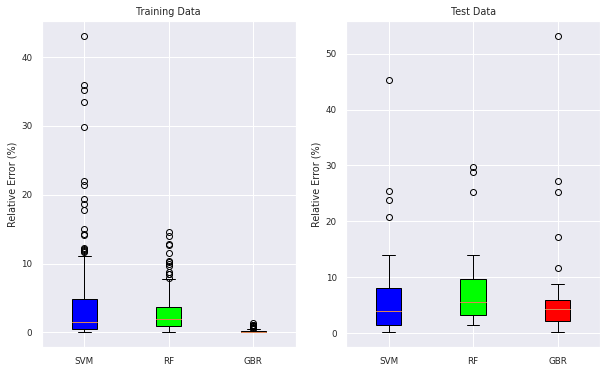

In [60]:
train_data = [svm_train_rel_error, rf_train_rel_error, gbr_train_rel_error]
test_data = [svm_test_rel_error, rf_test_rel_error, gbr_test_rel_error]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,6))

bp1 = ax1.boxplot(train_data, patch_artist=True)
bp2 = ax2.boxplot(test_data, patch_artist=True)

colors = ['#0000FF', '#00FF00', '#FF0000']
for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)

ax1.set_title('Training Data')
ax1.set_xticklabels(['SVM', 'RF', 'GBR'])
ax1.set_ylabel('Relative Error (%)')

ax2.set_title('Test Data')
ax2.set_xticklabels(['SVM', 'RF', 'GBR'])
ax2.set_ylabel('Relative Error (%)')

plt.show()

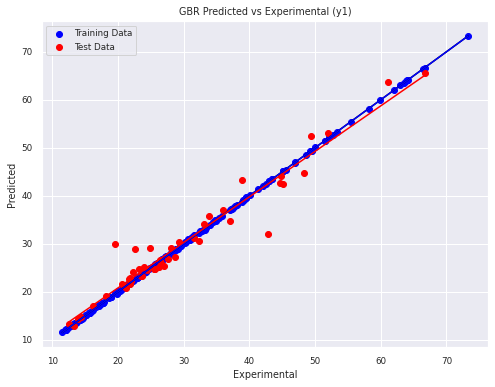

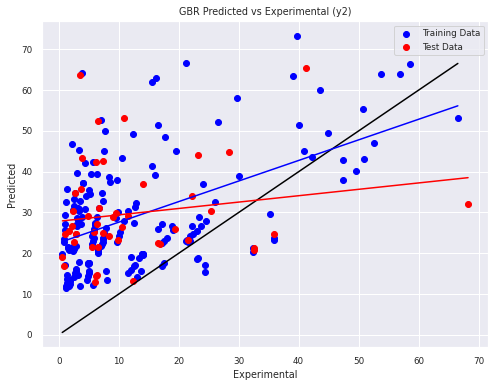

In [61]:
import matplotlib.pyplot as plt

# Plot predicted against experimental values for y1
plt.figure(figsize=(8, 6))
plt.scatter(y1_train, y1_gbr_train_pred, color='blue', label='Training Data')
plt.scatter(y1_test, y1_gbr_pred, color='red', label='Test Data')
plt.plot([min(y1_train), max(y1_train)], [min(y1_train), max(y1_train)], color='black')
plt.plot(np.unique(y1_train), np.poly1d(np.polyfit(y1_train, y1_gbr_train_pred, 1))(np.unique(y1_train)), color='blue')
plt.plot(np.unique(y1_test), np.poly1d(np.polyfit(y1_test, y1_gbr_pred, 1))(np.unique(y1_test)), color='red')
plt.title('GBR Predicted vs Experimental (y1)')
plt.xlabel('Experimental')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Plot predicted against experimental values for y2
plt.figure(figsize=(8, 6))
plt.scatter(y2_train, y2_gbr_train_pred, color='blue', label='Training Data')
plt.scatter(y2_test, y2_gbr_pred, color='red', label='Test Data')
plt.plot([min(y2_train), max(y2_train)], [min(y2_train), max(y2_train)], color='black')
plt.plot(np.unique(y2_train), np.poly1d(np.polyfit(y2_train, y2_gbr_train_pred, 1))(np.unique(y2_train)), color='blue')
plt.plot(np.unique(y2_test), np.poly1d(np.polyfit(y2_test, y2_gbr_pred, 1))(np.unique(y2_test)), color='red')
plt.title('GBR Predicted vs Experimental (y2)')
plt.xlabel('Experimental')
plt.ylabel('Predicted')
plt.legend()
plt.show()

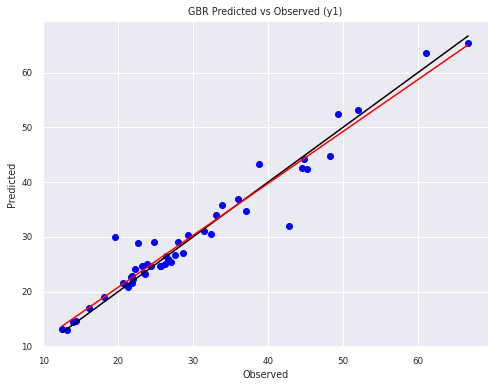

In [67]:

import matplotlib.pyplot as plt

# Plot predicted against observed values for y1 using the test data
plt.figure(figsize=(8, 6))
plt.scatter(y1_test, y1_gbr_pred, color='blue')
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], color='black')
plt.plot(np.unique(y1_test), np.poly1d(np.polyfit(y1_test, y1_gbr_pred, 1))(np.unique(y1_test)), color='red')
plt.title('GBR Predicted vs Observed (y1)')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()



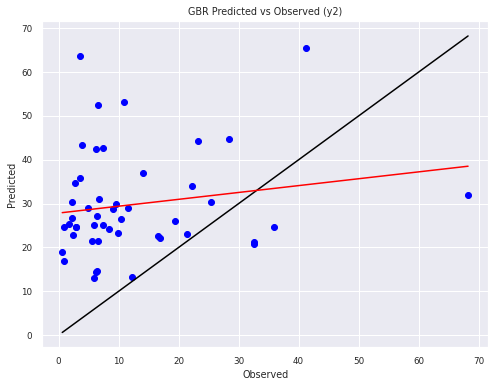

In [68]:
# Plot predicted against observed values for y2 using the test data
plt.figure(figsize=(8, 6))
plt.scatter(y2_test, y2_gbr_pred, color='blue')
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], color='black')
plt.plot(np.unique(y2_test), np.poly1d(np.polyfit(y2_test, y2_gbr_pred, 1))(np.unique(y2_test)), color='red')
plt.title('GBR Predicted vs Observed (y2)')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()


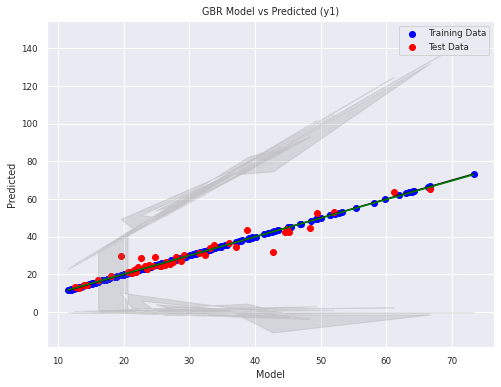

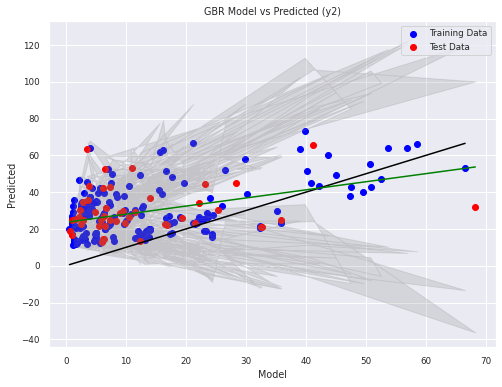

In [69]:
import matplotlib.pyplot as plt

# Plot model against predicted values for y1
plt.figure(figsize=(8, 6))
plt.scatter(y1_train, y1_gbr_train_pred, color='blue', label='Training Data')
plt.scatter(y1_test, y1_gbr_pred, color='red', label='Test Data')
plt.plot([min(y1_train), max(y1_train)], [min(y1_train), max(y1_train)], color='black')
plt.plot(np.unique(np.concatenate((y1_train, y1_test))), np.poly1d(np.polyfit(np.concatenate((y1_train, y1_test)), np.concatenate((y1_gbr_train_pred, y1_gbr_pred)), 1))(np.unique(np.concatenate((y1_train, y1_test)))), color='green')
plt.fill_between(np.concatenate((y1_train, y1_test)), np.concatenate((y1_gbr_train_pred, y1_gbr_pred)) - np.concatenate((y1_train, y1_test)), np.concatenate((y1_gbr_train_pred, y1_gbr_pred)) + np.concatenate((y1_train, y1_test)), color='grey', alpha=0.2)
plt.title('GBR Model vs Predicted (y1)')
plt.xlabel('Model')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Plot model against predicted values for y2
plt.figure(figsize=(8, 6))
plt.scatter(y2_train, y2_gbr_train_pred, color='blue', label='Training Data')
plt.scatter(y2_test, y2_gbr_pred, color='red', label='Test Data')
plt.plot([min(y2_train), max(y2_train)], [min(y2_train), max(y2_train)], color='black')
plt.plot(np.unique(np.concatenate((y2_train, y2_test))), np.poly1d(np.polyfit(np.concatenate((y2_train, y2_test)), np.concatenate((y2_gbr_train_pred, y2_gbr_pred)), 1))(np.unique(np.concatenate((y2_train, y2_test)))), color='green')
plt.fill_between(np.concatenate((y2_train, y2_test)), np.concatenate((y2_gbr_train_pred, y2_gbr_pred)) - np.concatenate((y2_train, y2_test)), np.concatenate((y2_gbr_train_pred, y2_gbr_pred)) + np.concatenate((y2_train, y2_test)), color='grey', alpha=0.2)
plt.title('GBR Model vs Predicted (y2)')
plt.xlabel('Model')
plt.ylabel('Predicted')
plt.legend()
plt.show()

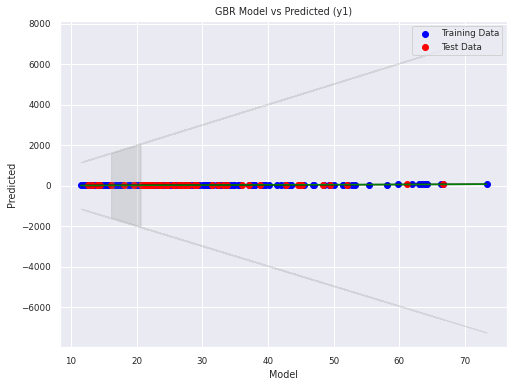

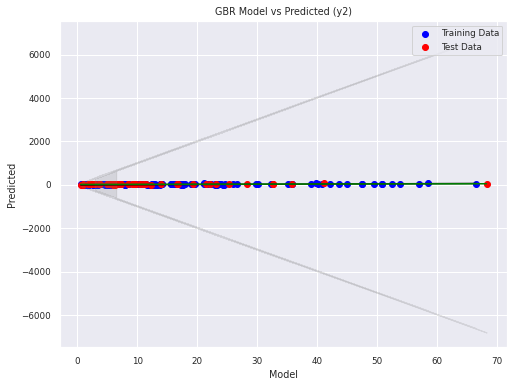

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Define threshold for deviation area
threshold = 100.0

# Plot model against predicted values for y1
plt.figure(figsize=(8, 6))
deviation_y1 = np.abs(y1_gbr_train_pred - y1_train)
plt.scatter(y1_train[deviation_y1 <= threshold], y1_gbr_train_pred[deviation_y1 <= threshold], color='blue', label='Training Data')
deviation_y1 = np.abs(y1_gbr_pred - y1_test)
plt.scatter(y1_test[deviation_y1 <= threshold], y1_gbr_pred[deviation_y1 <= threshold], color='red', label='Test Data')
plt.plot([min(y1_train), max(y1_train)], [min(y1_train), max(y1_train)], color='black')
plt.plot(np.unique(np.concatenate((y1_train, y1_test))), np.poly1d(np.polyfit(np.concatenate((y1_train, y1_test)), np.concatenate((y1_gbr_train_pred, y1_gbr_pred)), 1))(np.unique(np.concatenate((y1_train, y1_test)))), color='green')
plt.fill_between(np.concatenate((y1_train, y1_test)), np.concatenate((y1_gbr_train_pred, y1_gbr_pred)) - np.concatenate((y1_train, y1_test))*threshold, np.concatenate((y1_gbr_train_pred, y1_gbr_pred)) + np.concatenate((y1_train, y1_test))*threshold, color='grey', alpha=0.2)
plt.title('GBR Model vs Predicted (y1)')
plt.xlabel('Model')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Plot model against predicted values for y2
plt.figure(figsize=(8, 6))
deviation_y2 = np.abs(y2_gbr_train_pred - y2_train)
plt.scatter(y2_train[deviation_y2 <= threshold], y2_gbr_train_pred[deviation_y2 <= threshold], color='blue', label='Training Data')
deviation_y2 = np.abs(y2_gbr_pred - y2_test)
plt.scatter(y2_test[deviation_y2 <= threshold], y2_gbr_pred[deviation_y2 <= threshold], color='red', label='Test Data')
plt.plot([min(y2_train), max(y2_train)], [min(y2_train), max(y2_train)], color='black')
plt.plot(np.unique(np.concatenate((y2_train, y2_test))), np.poly1d(np.polyfit(np.concatenate((y2_train, y2_test)), np.concatenate((y2_gbr_train_pred, y2_gbr_pred)), 1))(np.unique(np.concatenate((y2_train, y2_test)))), color='green')
plt.fill_between(np.concatenate((y2_train, y2_test)), np.concatenate((y2_gbr_train_pred, y2_gbr_pred)) - np.concatenate((y2_train, y2_test))*threshold, np.concatenate((y2_gbr_train_pred, y2_gbr_pred)) + np.concatenate((y2_train, y2_test))*threshold, color='grey', alpha=0.2)
plt.title('GBR Model vs Predicted (y2)')
plt.xlabel('Model')
plt.ylabel('Predicted')
plt.legend()
plt.show()

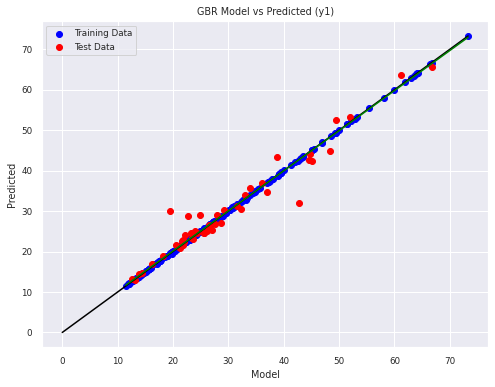

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Define threshold for deviation area
threshold = 120.0

# Plot model against predicted values for y1
plt.figure(figsize=(8, 6))
deviation_y1 = np.abs(y1_gbr_train_pred - y1_train)
plt.scatter(y1_train[deviation_y1 <= threshold], y1_gbr_train_pred[deviation_y1 <= threshold], color='blue', label='Training Data')
deviation_y1 = np.abs(y1_gbr_pred - y1_test)
plt.scatter(y1_test[deviation_y1 <= threshold], y1_gbr_pred[deviation_y1 <= threshold], color='red', label='Test Data')
plt.plot([0, max(y1_train)], [0, max(y1_train)], color='black')
plt.plot(np.unique(np.concatenate((y1_train, y1_test))), np.poly1d(np.polyfit(np.concatenate((y1_train, y1_test)), np.concatenate((y1_gbr_train_pred, y1_gbr_pred)), 1))(np.unique(np.concatenate((y1_train, y1_test)))), color='green')
plt.title('GBR Model vs Predicted (y1)')
plt.xlabel('Model')
plt.ylabel('Predicted')
plt.legend()
plt.show()

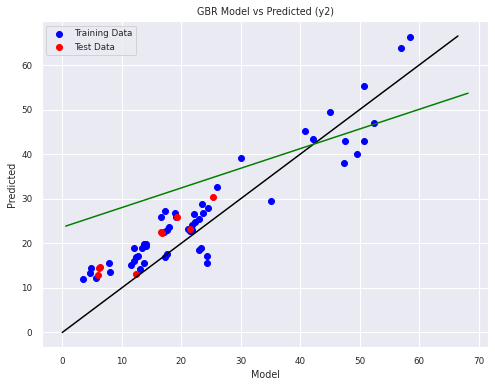

In [90]:
# Define threshold for deviation area
threshold = 10.0
# Plot model against predicted values for y2
plt.figure(figsize=(8, 6))
deviation_y2 = np.abs(y2_gbr_train_pred - y2_train)
plt.scatter(y2_train[deviation_y2 <= threshold], y2_gbr_train_pred[deviation_y2 <= threshold], color='blue', label='Training Data')
deviation_y2 = np.abs(y2_gbr_pred - y2_test)
plt.scatter(y2_test[deviation_y2 <= threshold], y2_gbr_pred[deviation_y2 <= threshold], color='red', label='Test Data')
plt.plot([0, max(y2_train)], [0, max(y2_train)], color='black')
plt.plot(np.unique(np.concatenate((y2_train, y2_test))), np.poly1d(np.polyfit(np.concatenate((y2_train, y2_test)), np.concatenate((y2_gbr_train_pred, y2_gbr_pred)), 1))(np.unique(np.concatenate((y2_train, y2_test)))), color='green')
plt.title('GBR Model vs Predicted (y2)')
plt.xlabel('Model')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [95]:
# load data into pandas dataframe
data = pd.read_excel('/content/sample_data/CLC Data_s.xlsx')


In [96]:
# Get feature names from DataFrame columns
feature_names = df.columns[:-2]  # exclude the last two columns which are the output variables

# Print feature names
print(feature_names)

Index(['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)',
       'FC (%)', 'Moisture (%)', 'T (°C)', 'OC (%)', 'SBR'],
      dtype='object')


In [98]:
import matplotlib.pyplot as plt

# Define feature names
feature_names = ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)', 'Moisture (%)', 'T (°C)', 'OC (%)', 'SBR']



In [100]:
# Fit GBR models for both output variables
gbr_y1 = GradientBoostingRegressor()
gbr_y1.fit(X, y1)

gbr_y2 = GradientBoostingRegressor()
gbr_y2.fit(X, y2)

GradientBoostingRegressor()

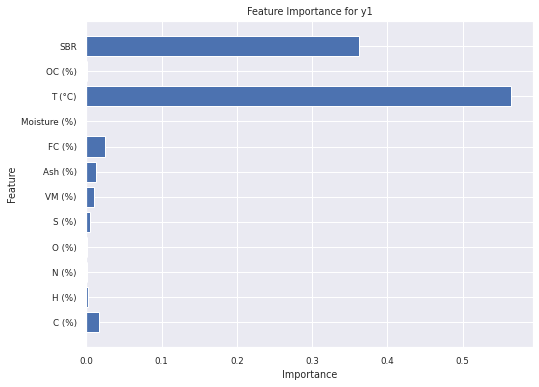

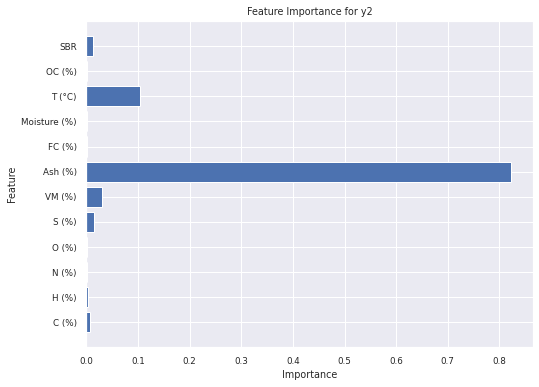

In [102]:
# Plot feature importance for y1
plt.figure(figsize=(8, 6))
plt.barh(feature_names, gbr_y1.feature_importances_)
plt.title('Feature Importance for y1')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
# Plot feature importance for y2
plt.figure(figsize=(8, 6))
plt.barh(feature_names, gbr_y2.feature_importances_)
plt.title('Feature Importance for y2')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

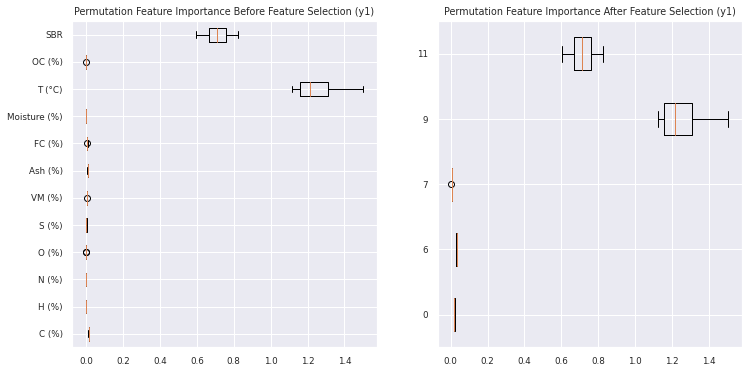

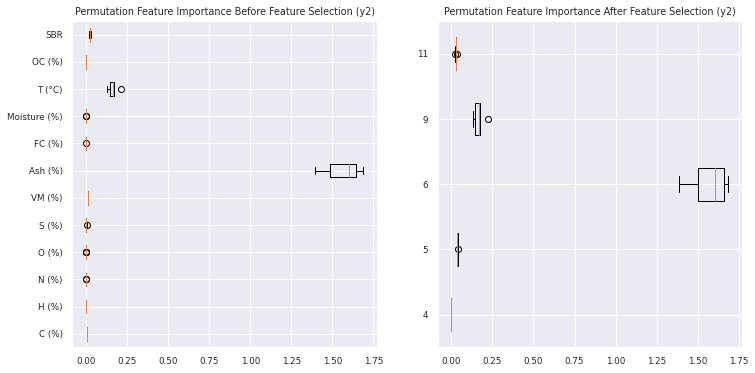

In [104]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
# Fit GBR models for both output variables
gbr_y1 = GradientBoostingRegressor()
gbr_y1.fit(X, y1)

gbr_y2 = GradientBoostingRegressor()
gbr_y2.fit(X, y2)

# Calculate permutation feature importance before feature selection
results_y1_before = permutation_importance(gbr_y1, X, y1, n_repeats=10, random_state=0)
results_y2_before = permutation_importance(gbr_y2, X, y2, n_repeats=10, random_state=0)

# Perform feature selection using GBR models
threshold = 0.01  # set threshold for feature selection
selector_y1 = SelectFromModel(gbr_y1, threshold=threshold)
selector_y1.fit(X, y1)
X_selected_y1 = selector_y1.transform(X)

selector_y2 = SelectFromModel(gbr_y2, threshold=threshold)
selector_y2.fit(X, y2)
X_selected_y2 = selector_y2.transform(X)

# Fit GBR models with selected features
gbr_y1_selected = GradientBoostingRegressor()
gbr_y1_selected.fit(X_selected_y1, y1)

gbr_y2_selected = GradientBoostingRegressor()
gbr_y2_selected.fit(X_selected_y2, y2)

# Calculate permutation feature importance after feature selection
results_y1_after = permutation_importance(gbr_y1_selected, X_selected_y1, y1, n_repeats=10, random_state=0)
results_y2_after = permutation_importance(gbr_y2_selected, X_selected_y2, y2, n_repeats=10, random_state=0)

# Plot permutation feature importance before and after feature selection for y1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(results_y1_before.importances.T, vert=False, labels=feature_names)
plt.title('Permutation Feature Importance Before Feature Selection (y1)')

plt.subplot(1, 2, 2)
plt.boxplot(results_y1_after.importances.T, vert=False, labels=selector_y1.get_support(indices=True))
plt.title('Permutation Feature Importance After Feature Selection (y1)')
plt.show()

# Plot permutation feature importance before and after feature selection for y2
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(results_y2_before.importances.T, vert=False, labels=feature_names)
plt.title('Permutation Feature Importance Before Feature Selection (y2)')

plt.subplot(1, 2, 2)
plt.boxplot(results_y2_after.importances.T, vert=False, labels=selector_y2.get_support(indices=True))
plt.title('Permutation Feature Importance After Feature Selection (y2)')
plt.show()


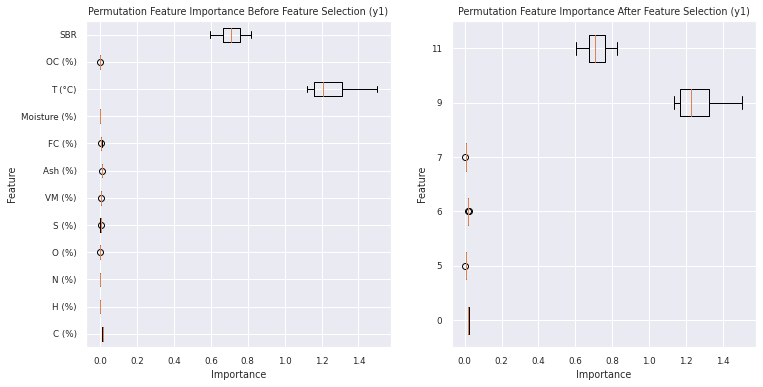

In [105]:
# Fit GBR models for both output variables
gbr_y1 = GradientBoostingRegressor()
gbr_y1.fit(X, y1)

gbr_y2 = GradientBoostingRegressor()
gbr_y2.fit(X, y2)

# Calculate permutation feature importance before feature selection
results_y1_before = permutation_importance(gbr_y1, X, y1, n_repeats=10, random_state=0)
results_y2_before = permutation_importance(gbr_y2, X, y2, n_repeats=10, random_state=0)

# Perform feature selection using GBR models
threshold = 0.01  # set threshold for feature selection
selector_y1 = SelectFromModel(gbr_y1, threshold=threshold)
selector_y1.fit(X, y1)
X_selected_y1 = selector_y1.transform(X)

selector_y2 = SelectFromModel(gbr_y2, threshold=threshold)
selector_y2.fit(X, y2)
X_selected_y2 = selector_y2.transform(X)

# Fit GBR models with selected features
gbr_y1_selected = GradientBoostingRegressor()
gbr_y1_selected.fit(X_selected_y1, y1)

gbr_y2_selected = GradientBoostingRegressor()
gbr_y2_selected.fit(X_selected_y2, y2)

# Calculate permutation feature importance after feature selection
results_y1_after = permutation_importance(gbr_y1_selected, X_selected_y1, y1, n_repeats=10, random_state=0)
results_y2_after = permutation_importance(gbr_y2_selected, X_selected_y2, y2, n_repeats=10, random_state=0)

# Plot permutation feature importance before and after feature selection for y1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(results_y1_before.importances.T, vert=False, labels=feature_names)
plt.title('Permutation Feature Importance Before Feature Selection (y1)')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.subplot(1, 2, 2)
plt.boxplot(results_y1_after.importances.T, vert=False, labels=selector_y1.get_support(indices=True))
plt.title('Permutation Feature Importance After Feature Selection (y1)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

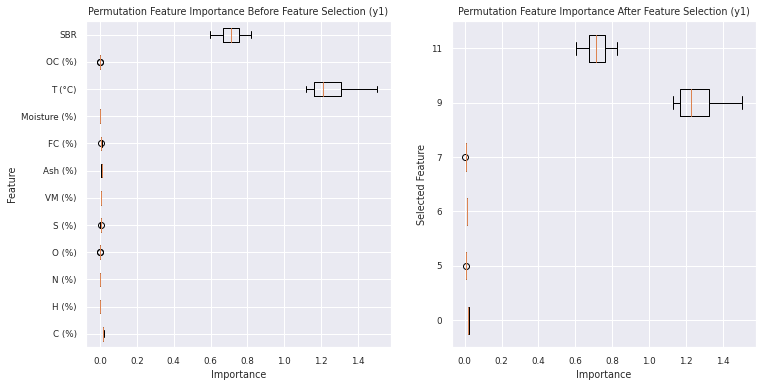

In [106]:
# Fit GBR models for both output variables
gbr_y1 = GradientBoostingRegressor()
gbr_y1.fit(X, y1)

gbr_y2 = GradientBoostingRegressor()
gbr_y2.fit(X, y2)

# Calculate permutation feature importance before feature selection
results_y1_before = permutation_importance(gbr_y1, X, y1, n_repeats=10, random_state=0)
results_y2_before = permutation_importance(gbr_y2, X, y2, n_repeats=10, random_state=0)

# Perform feature selection using GBR models
threshold = 0.01  # set threshold for feature selection
selector_y1 = SelectFromModel(gbr_y1, threshold=threshold)
selector_y1.fit(X, y1)
X_selected_y1 = selector_y1.transform(X)

selector_y2 = SelectFromModel(gbr_y2, threshold=threshold)
selector_y2.fit(X, y2)
X_selected_y2 = selector_y2.transform(X)

# Fit GBR models with selected features
gbr_y1_selected = GradientBoostingRegressor()
gbr_y1_selected.fit(X_selected_y1, y1)

gbr_y2_selected = GradientBoostingRegressor()
gbr_y2_selected.fit(X_selected_y2, y2)

# Calculate permutation feature importance after feature selection
results_y1_after = permutation_importance(gbr_y1_selected, X_selected_y1, y1, n_repeats=10, random_state=0)
results_y2_after = permutation_importance(gbr_y2_selected, X_selected_y2, y2, n_repeats=10, random_state=0)

# Plot permutation feature importance before and after feature selection for y1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(results_y1_before.importances.T, vert=False, labels=feature_names)
plt.title('Permutation Feature Importance Before Feature Selection (y1)')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.subplot(1, 2, 2)
plt.boxplot(results_y1_after.importances.T, vert=False, labels=selector_y1.get_support(indices=True))
plt.title('Permutation Feature Importance After Feature Selection (y1)')
plt.xlabel('Importance')
plt.ylabel('Selected Feature')
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 7.7 MB/s eta 0:00:00


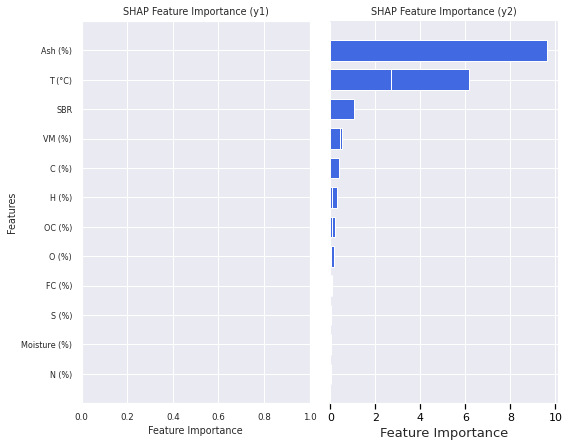

In [110]:
!pip install shap
import pandas as pd
import numpy as np
import shap
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
# Fit GBR models for both output variables
gbr_y1 = GradientBoostingRegressor()
gbr_y1.fit(X, y1)

gbr_y2 = GradientBoostingRegressor()
gbr_y2.fit(X, y2)

# Calculate SHAP values for each output variable
explainer_y1 = shap.Explainer(gbr_y1)
shap_values_y1 = explainer_y1(X)

explainer_y2 = shap.Explainer(gbr_y2)
shap_values_y2 = explainer_y2(X)

# Plot SHAP feature importance for both output variables
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharey=True)
shap.summary_plot(shap_values_y1, X, feature_names=feature_names, show=False, plot_type='bar', color='royalblue', axis_color='black', alpha=0.8, sort=True)
axes[0].set_title('SHAP Feature Importance (y1)')
axes[0].set_xlabel('Feature Importance')
axes[0].set_ylabel('Features')
axes[0].tick_params(axis='y', labelsize=8)

shap.summary_plot(shap_values_y2, X, feature_names=feature_names, show=False, plot_type='bar', color='royalblue', axis_color='black', alpha=0.8, sort=True)
axes[1].set_title('SHAP Feature Importance (y2)')
axes[1].set_xlabel('Feature Importance')
axes[1].set_ylabel('')
axes[1].tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()

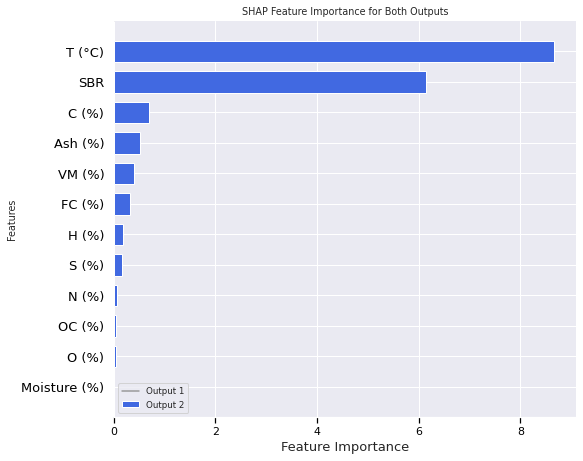

In [122]:
# Fit GBR models for both output variables
gbr_y1 = GradientBoostingRegressor()
gbr_y1.fit(X, y1)

gbr_y2 = GradientBoostingRegressor()
gbr_y2.fit(X, y2)

# Calculate SHAP values for each output variable
explainer_y1 = shap.Explainer(gbr_y1)
shap_values_y1 = explainer_y1(X).values

explainer_y2 = shap.Explainer(gbr_y2)
shap_values_y2 = explainer_y2(X).values

# Plot SHAP feature importance for both output variables
plt.figure(figsize=(12, 6))
#shap.summary_plot([shap_values_y1, shap_values_y2], X, feature_names=feature_names, show=False, plot_type='bar', color=['royalblue', 'darkorange'], axis_color='black', alpha=0.8, sort=True)
shap.summary_plot(shap_values_y1, X, feature_names=feature_names, show=False, plot_type='bar', color='royalblue', axis_color='black', alpha=0.8, sort=True)
plt.legend(['Output 1', 'Output 2'])
plt.title('SHAP Feature Importance for Both Outputs')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

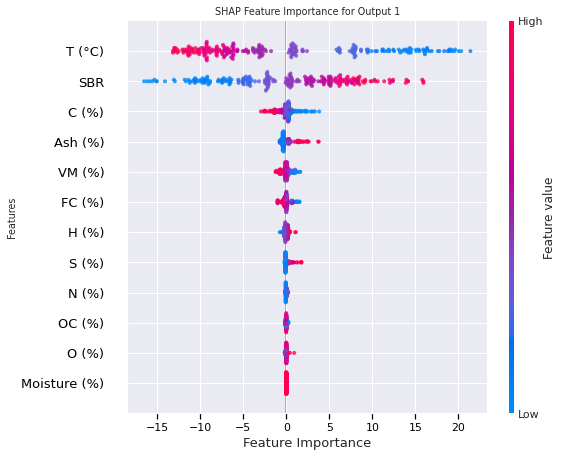

In [123]:
# Fit GBR model for output 1
gbr_y1 = GradientBoostingRegressor()
gbr_y1.fit(X, y1)

# Calculate SHAP values for output 1
explainer_y1 = shap.Explainer(gbr_y1)
shap_values_y1 = explainer_y1(X)

# Plot SHAP summary plot for output 1
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values_y1, X, feature_names=feature_names, show=False, color='royalblue', axis_color='black', alpha=0.8, sort=True)
plt.title('SHAP Feature Importance for Output 1')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

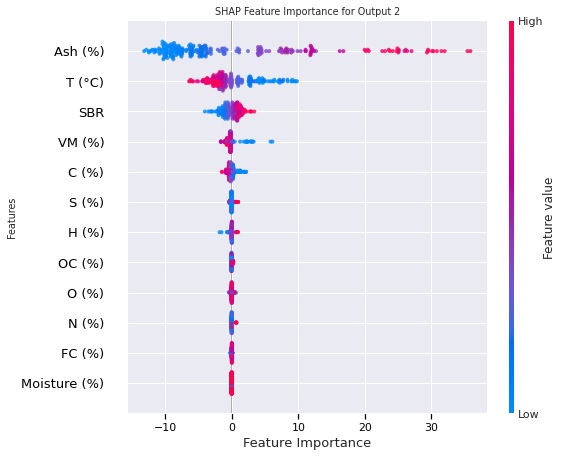

In [124]:
# Fit GBR model for output 2
gbr_y2 = GradientBoostingRegressor()
gbr_y2.fit(X, y2)

# Calculate SHAP values for output 2
explainer_y2 = shap.Explainer(gbr_y2)
shap_values_y2 = explainer_y2(X)

# Plot SHAP summary plot for output 2
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values_y2, X, feature_names=feature_names, show=False, color='darkorange', axis_color='black', alpha=0.8, sort=True)
plt.title('SHAP Feature Importance for Output 2')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

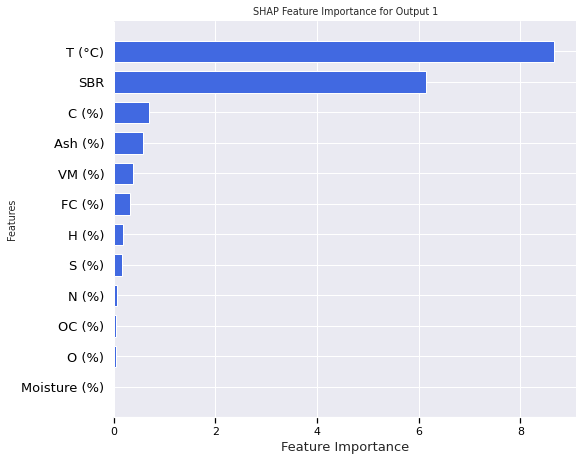

In [125]:
# Fit GBR model for output 1
gbr_y1 = GradientBoostingRegressor()
gbr_y1.fit(X, y1)

# Calculate SHAP values for output 1
explainer_y1 = shap.Explainer(gbr_y1)
shap_values_y1 = explainer_y1(X)

# Plot SHAP feature importance for output 1
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values_y1, X, feature_names=feature_names, show=False, color='royalblue', plot_type='bar', axis_color='black', alpha=0.8, sort=True)
plt.title('SHAP Feature Importance for Output 1')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

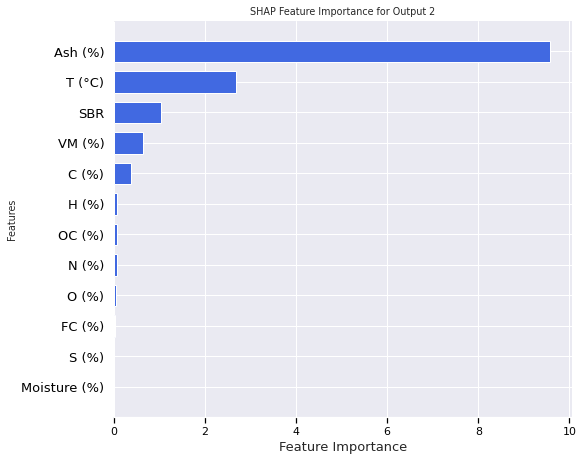

In [127]:
# Fit GBR model for output 2
gbr_y2 = GradientBoostingRegressor()
gbr_y2.fit(X, y2)

# Calculate SHAP values for output 2
explainer_y2 = shap.Explainer(gbr_y2)
shap_values_y2 = explainer_y2(X)

# Plot SHAP feature importance for output 2
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values_y2, X, feature_names=feature_names, show=False, color='royalblue', plot_type='bar', axis_color='black', alpha=0.8, sort=True)
plt.title('SHAP Feature Importance for Output 2')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [137]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from matplotlib import cm


# Get feature names from DataFrame columns
feature_names = df.columns[:-2]  # exclude the last two columns which are the output variables

print(df.columns)

Index(['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)',
       'FC (%)', 'Moisture (%)', 'T (°C)', 'OC (%)', 'SBR', 'H2 (wt.%)',
       'Char yield (wt.%)'],
      dtype='object')


In [138]:
# Split data into input (X) and output (y) variables
X = df[feature_names].values
y1 = df['H2 (wt.%)'].values



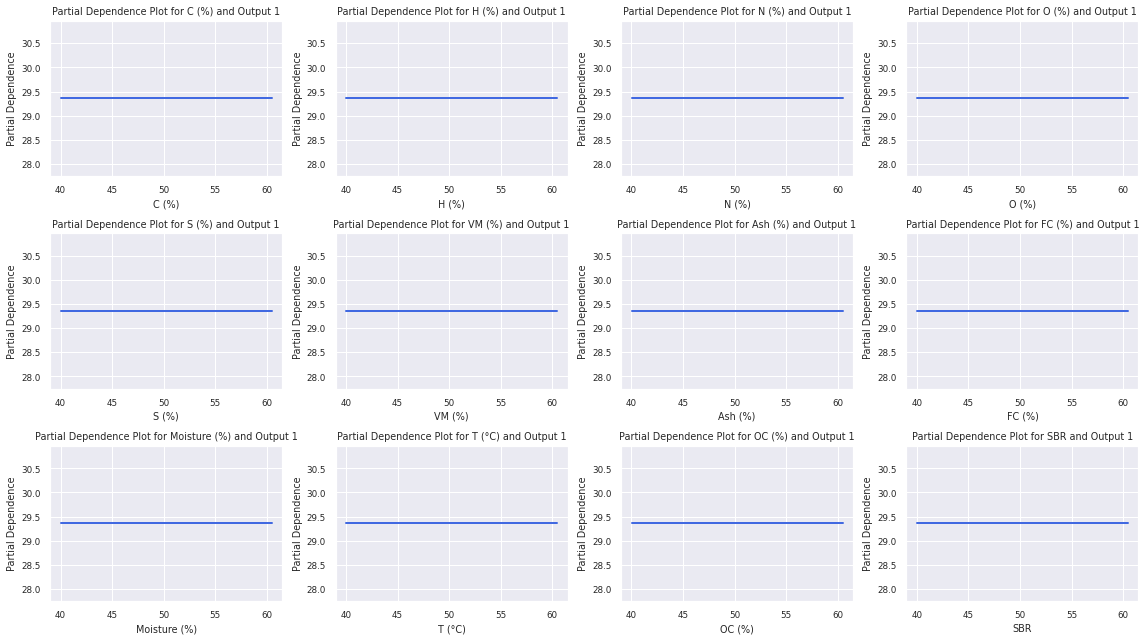

In [141]:
# Fit GBR model for output 1
gbr_y1 = GradientBoostingRegressor()
gbr_y1.fit(X, y1)

# Define grid for partial dependence plot
grid_resolution = 50  # increase or decrease this number for more or fewer grid points
grid_values = np.linspace(df[feature_names[0]].min(), df[feature_names[0]].max(), grid_resolution)

# Plot partial dependence line plots for each input variable for output 1
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 9))
for i, ax in enumerate(axes.flatten()):
    x = X[:, i]
    y = gbr_y1.predict(X)
    pdp_values = []
    for val in grid_values:
        x_temp = x.copy()
        x_temp[:] = val
        y_temp = gbr_y1.predict(X)
        pdp_values.append(y_temp.mean())
    ax.plot(grid_values, pdp_values, color='royalblue', linewidth=2)
    ax.set_xlabel(feature_names[i])
    ax.set_ylabel('Partial Dependence')
    ax.set_title(f'Partial Dependence Plot for {feature_names[i]} and Output 1')
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import numpy as np
!pip install shap 
import shap
from sklearn.ensemble import GradientBoostingRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 8.8 MB/s eta 0:00:00


Permutation explainer: 101it [00:24,  3.98it/s]


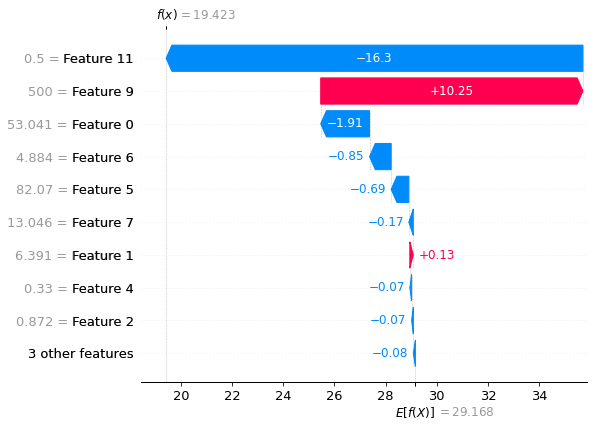

In [10]:
# load data into pandas dataframe
df = pd.read_excel('/content/CLC Data_s.xlsx')

# Get feature names from DataFrame columns
feature_names = df.columns[:-2]  # exclude the last two columns which are the output variables

# Split data into input (X) and output (y) variables
X = df[feature_names].values
y1 = df['H2 (wt.%)'].values

# Fit GBR model for output 1
gbr_y1 = GradientBoostingRegressor()
gbr_y1.fit(X, y1)

# Calculate SHAP values for the first 100 samples in the test set
explainer = shap.Explainer(gbr_y1.predict, X[:100])
shap_values = explainer(X[:100])

# Plot the SHAP explanation diagram for the first 100 samples in the test set
shap.plots.waterfall(shap_values[0])

Permutation explainer: 101it [00:10,  1.12it/s]                         


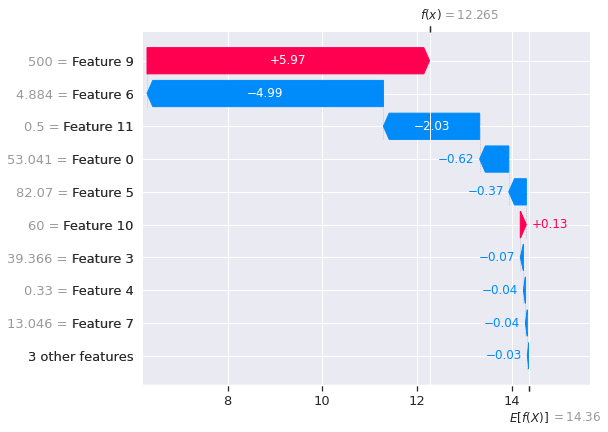

In [152]:
# Get feature names from DataFrame columns
feature_names = df.columns[:-2]  # exclude the last two columns which are the output variables

# Split data into input (X) and output (y) variables
X = df[feature_names].values
y2 = df['Char yield (wt.%)'].values

# Fit GBR model for output 2
gbr_y2 = GradientBoostingRegressor()
gbr_y2.fit(X, y2)

# Calculate SHAP values for the first 100 samples in the test set
explainer = shap.Explainer(gbr_y2.predict, X[:100])
shap_values = explainer(X[:100])

# Plot the SHAP explanation diagram for the first 100 samples in the test set
shap.plots.waterfall(shap_values[0])

In [11]:
import plotly.graph_objs as go
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np


# Get feature names from DataFrame columns
feature_names = df.columns[:-2]  # exclude the last two columns which are the output variables

# Split data into input (X) and output (y) variables
X = df[feature_names].values
y1 = df['H2 (wt.%)'].values

# Set up the parameter grid
param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1.0],
              'n_estimators': [50, 100, 200, 400],
              'max_depth': [2, 3, 4, 5]}

# Fit a GridSearchCV model on the data
gbr = GradientBoostingRegressor()
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y1)

# Extract the parameter values and scores
learning_rates = np.array(param_grid['learning_rate'])
n_estimators = np.array(param_grid['n_estimators'])
max_depths = np.array(param_grid['max_depth'])
scores = np.reshape(grid_search.cv_results_['mean_test_score'], (len(learning_rates), len(n_estimators), len(max_depths)))

# Create a contour plot of the scores
fig = go.Figure(data=[go.Contour(z=scores, x=learning_rates, y=n_estimators)])
fig.update_layout(title='Contour Plot for Hyperparameter Optimization',
                  xaxis_title='Learning Rate', yaxis_title='Number of Estimators')
fig.show()


In [12]:
import plotly.graph_objs as go
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np


In [13]:
# Get feature names from DataFrame columns
feature_names = df.columns[:-2]  # exclude the last two columns which are the output variables

# Split data into input (X) and output (y) variables
X = df[feature_names].values
y1 = df['H2 (wt.%)'].values

# Set up the parameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}

# Fit a GridSearchCV model on the data
svm = SVR(kernel='rbf')
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y1)

# Extract the parameter values and scores
C_values = np.array(param_grid['C'])
gamma_values = np.array(param_grid['gamma'])
scores = np.reshape(grid_search.cv_results_['mean_test_score'], (len(C_values), len(gamma_values)))

# Create a contour plot of the scores
fig = go.Figure(data=[go.Contour(z=scores, x=gamma_values, y=C_values)])
fig.update_layout(title='Contour Plot for Hyperparameter Optimization (SVM)',
                  xaxis_title='Gamma', yaxis_title='C')
fig.show()

In [14]:
# Set up the parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Fit a GridSearchCV model on the data
svm = SVR(kernel='rbf')
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y1)

# Extract the parameter values and scores
C_values = np.array(param_grid['C'])
gamma_values = np.array(param_grid['gamma'])
scores = np.reshape(grid_search.cv_results_['mean_test_score'], (len(C_values), len(gamma_values)))

# Create a contour plot of the scores
fig = go.Figure(data=[go.Contour(z=scores, x=gamma_values, y=C_values)])
fig.update_layout(title='Contour Plot for Hyperparameter Optimization (SVM)',
                  xaxis_title='Gamma', yaxis_title='C')
fig.show()

In [17]:
# load data into pandas dataframe
df = pd.read_excel('/content/CLC Data_s.xlsx')

In [20]:
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd

# Get feature names from DataFrame columns
feature_names = df.columns[:-2]  # exclude the last two columns which are the output variables

# Split data into input (X) and output (y) variables
X = df[feature_names].values
y1 = df['H2 (wt.%)'].values
y2 = df['Char yield (wt.%)'].values

# Create a GradientBoostingRegressor model and fit it on the data
gbr = GradientBoostingRegressor()
gbr.fit(X, y1)



GradientBoostingRegressor()